In [1]:
plt.style.use('bmh')

df = pd.read_pickle('data/df.pkl')
print(df.shape)
# df[:3]

(323410, 49)


In [2]:
# df.fkLinkSerialId.value_counts()

In [3]:
feats_info = ['timestamp','fkLinkSerialId']

feats_ts  = ['ts_month','ts_hour','ts_season']
feats_geo = ['speed','heading','msla','lat','long','geo_group']
feats_wh  = ['temperature','feels_like','pressure','humidity','clouds','visibility','wind_speed','wind_gust','wind_deg','rain','snow']

feats_trg1 = ['target_humidity','target_temperature']
feats_trg2 = ['target_humidity_cat','target_temperature_cat','target_cat']

### Find correlations between geolocation, external weather, timestamp, and internal microclimate data. How are these pillars interconnected? (10 points)

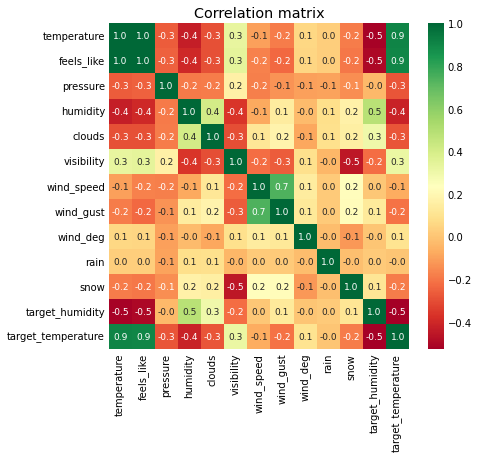

In [4]:
df_corr = df[feats_wh + feats_trg1].corr()
_, ax = plt.subplots(1,1, figsize = (6,6))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.1f', annot_kws={"size": 9})
_ = ax.set_title('Correlation matrix')

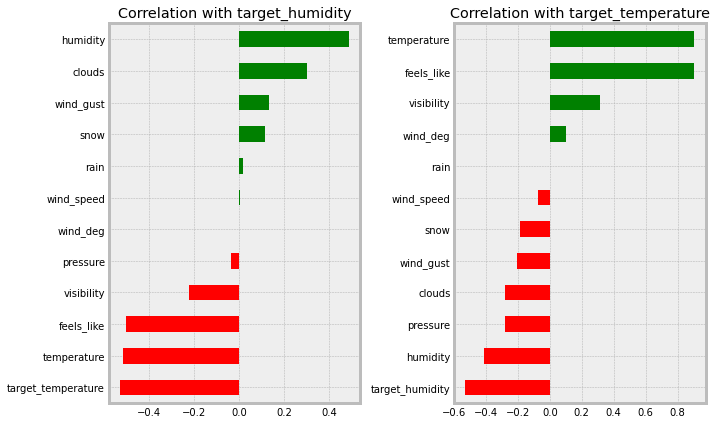

In [5]:
f = feats_trg1[0]
df_corr[f].sort_values()

_, ax= plt.subplots(1,2, figsize = (10,6))
for i,f in enumerate(feats_trg1):
    x = df_corr[f].sort_values(ascending = False)[1:].sort_values().reset_index()
    x['c'] = x[f].map(lambda a: 'green' if a > 0 else 'red')
    x.set_index('index', inplace = True)
    _ = x[f].plot(kind = 'barh', ax = ax[i], title = 'Correlation with '+f, color = x['c'], ylabel = '')
    
plt.tight_layout()

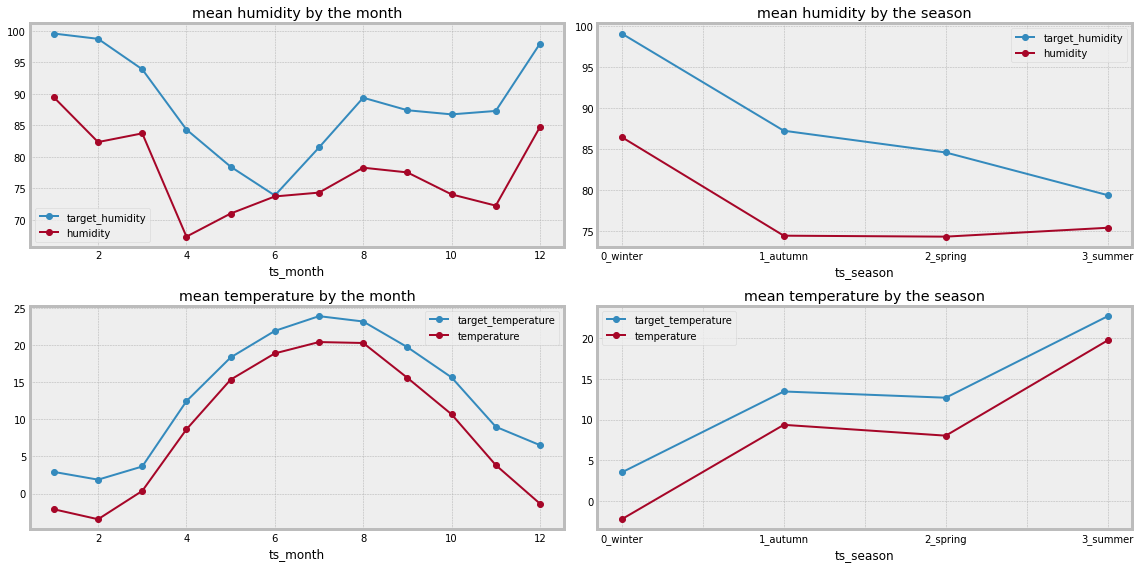

In [6]:
feats1 = ['humidity','temperature']
_, ax = plt.subplots(2,2, figsize = (16,8)) 

i = 0
feats = [feats_trg1[i],feats1[i]]

x = df.groupby('ts_month').mean()[feats]
_ = x.plot(ax = ax[i][0], style = 'o-', title = f'mean {feats1[i]} by the month')

x = df.groupby('ts_season').mean()[feats]
_ = x.plot(ax = ax[i][1], style = 'o-', title = f'mean {feats1[i]} by the season')


i = 1
feats = [feats_trg1[i],feats1[i]]

x = df.groupby('ts_month').mean()[feats]
_ = x.plot(ax = ax[i][0], style = 'o-', title = f'mean {feats1[i]} by the month')

x = df.groupby('ts_season').mean()[feats]
_ = x.plot(ax = ax[i][1], style = 'o-', title = f'mean {feats1[i]} by the season')

plt.tight_layout()

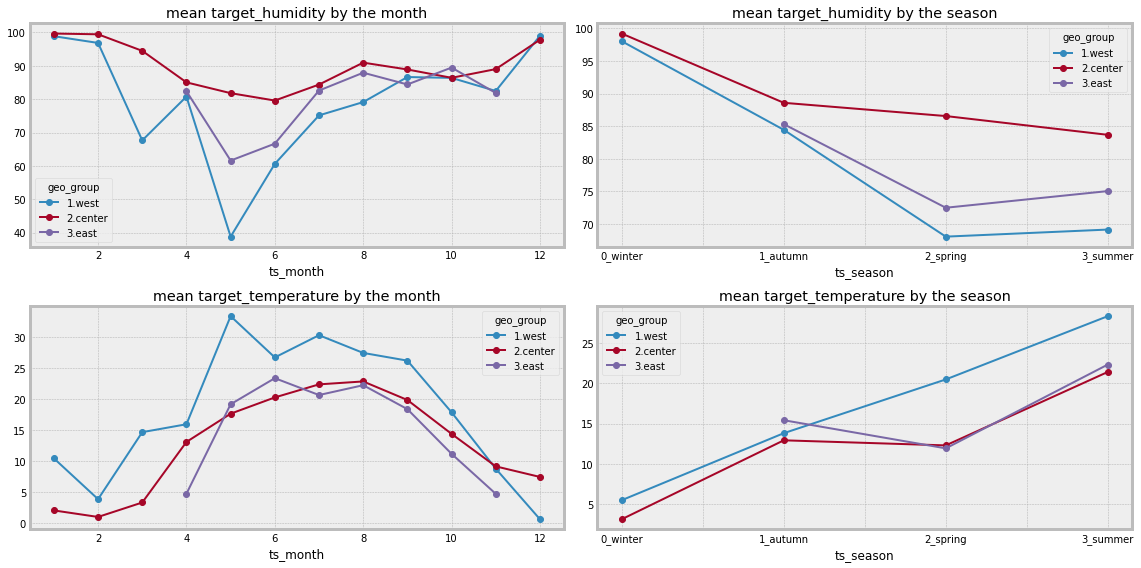

In [7]:
feats1 = ['humidity','temperature']
_, ax = plt.subplots(2,2, figsize = (16,8)) 

i = 0
feats = [feats_trg1[i],feats1[i]]

x = df.groupby(['ts_month','geo_group']).mean()[feats_trg1[i]].unstack()
_ = x.plot(ax = ax[i][0], style = 'o-', title = f'mean {feats_trg1[i]} by the month')

x = df.groupby(['ts_season','geo_group']).mean()[feats_trg1[i]].unstack()
_ = x.plot(ax = ax[i][1], style = 'o-', title = f'mean {feats_trg1[i]} by the season')


i = 1
feats = [feats_trg1[i],feats1[i]]

x = df.groupby(['ts_month','geo_group']).mean()[feats_trg1[i]].unstack()
_ = x.plot(ax = ax[i][0], style = 'o-', title = f'mean {feats_trg1[i]} by the month')

x = df.groupby(['ts_season','geo_group']).mean()[feats_trg1[i]].unstack()
_ = x.plot(ax = ax[i][1], style = 'o-', title = f'mean {feats_trg1[i]} by the season')

plt.tight_layout()

### How does this interconnectedness influence the risk of dangerous temperatures or humidity? (10 points)

In [8]:
df[feats_trg2].mean()

target_humidity_cat      0.72
target_temperature_cat   0.16
target_cat               0.84
dtype: float64

In [9]:
# create dataset
feats_test = ['temperature','humidity','geo_group','ts_season']
df2 = df[feats_test + feats_trg2]
df2 = df2[df2[feats_trg2[1]].notnull()]

df2['temperature'] = df2['temperature'].map(lambda x: round(x,2))
df2.loc[df2.temperature < -19, 'temperature'] = -19
df2['temperature'] = df2.temperature.astype(np.float32)
for feat in ['temperature','humidity']:
    # continue
    df2[feat] = pd.qcut(df2[feat], q = 10, labels = None, duplicates='drop')
    # display(df2.groupby(f'{feat}_gr')[feat].agg([min,max, len]))

print(df2.shape)
df2[:3]

(99652, 7)


,temperature,humidity,geo_group,ts_season,target_humidity_cat,target_temperature_cat,target_cat
8133,"(7.66, 12.37]","(7.999, 50.0]",3.east,2_spring,0.00,0.00,0.00
8135,"(7.66, 12.37]","(7.999, 50.0]",3.east,2_spring,0.00,0.00,0.00
9462,"(1.96, 7.66]","(59.0, 68.0]",2.center,2_spring,0.00,0.00,0.00


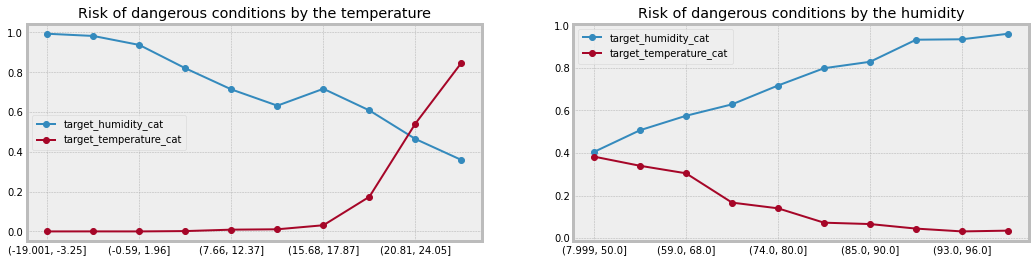

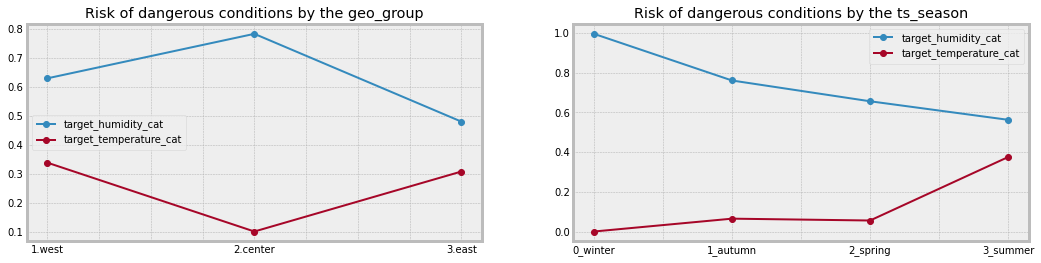

In [10]:
_,ax = plt.subplots(1,2, figsize = (16,4))
for i,feat in enumerate(feats_test[:2]):
    _ = df2.groupby(feat)[feats_trg2[0]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)
    _ = df2.groupby(feat)[feats_trg2[1]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)

_,ax = plt.subplots(1,2, figsize = (16,4))
for i,feat in enumerate(feats_test[2:]):
    _ = df2.groupby(feat)[feats_trg2[0]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)
    _ = df2.groupby(feat)[feats_trg2[1]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)


### How do specific weather events (like high winds) or variables such as the proximity of farms to roads contribute to temperature risk? (10 points)

In [11]:
feats_spec = ['wind_speed', 'wind_gust', 'rain', 'snow']

df2 = df[feats_spec + feats_trg2]
df2 = df2[df2[feats_trg2[1]].notnull()]

df2.describe(percentiles = [0.9,0.95,0.97,0.99])

,wind_speed,wind_gust,rain,snow,target_humidity_cat,target_temperature_cat,target_cat
count,"99,652.00","99,652.00","99,652.00","99,652.00","99,652.00","99,652.00","99,652.00"
mean,4.08,5.66,0.04,0.06,0.72,0.16,0.84
std,2.18,4.79,0.40,0.34,0.45,0.37,0.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.67,4.96,0.00,0.00,1.00,0.00,1.00
90%,7.20,12.00,0.00,0.00,1.00,1.00,1.00
95%,8.16,13.99,0.00,0.20,1.00,1.00,1.00
97%,9.06,15.82,0.11,0.65,1.00,1.00,1.00
99%,10.29,18.21,1.19,1.65,1.00,1.00,1.00
max,15.43,22.07,36.76,13.76,1.00,1.00,1.00


In [12]:
# binary
df2[feats_spec[0]] = df2[feats_spec[0]] > 10
df2[feats_spec[1]] = df2[feats_spec[1]] > 15
df2[feats_spec[2]] = df2[feats_spec[2]] > 0
df2[feats_spec[3]] = df2[feats_spec[3]] > 0

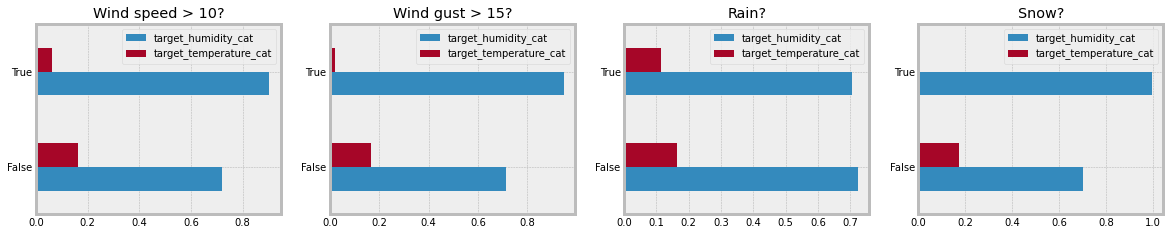

In [13]:
_,ax = plt.subplots(1,4, figsize = (18,3.5))

i = 0
feat = feats_spec[i]
df3 = df2.groupby(feat)[feats_trg2[:2]].agg(np.mean)
_ = df3.plot(ax = ax[i], kind = 'barh', ylabel = '', title = 'Wind speed > 10?', legend = True)

i = 1
feat = feats_spec[i]
df3 = df2.groupby(feat)[feats_trg2[:2]].agg(np.mean)
_ = df3.plot(ax = ax[i], kind = 'barh', ylabel = '', title = 'Wind gust > 15?', legend = True)

i = 2
feat = feats_spec[i]
df3 = df2.groupby(feat)[feats_trg2[:2]].agg(np.mean)
_ = df3.plot(ax = ax[i], kind = 'barh', ylabel = '', title = 'Rain?', legend = True)

i = 3
feat = feats_spec[i]
df3 = df2.groupby(feat)[feats_trg2[:2]].agg(np.mean)
_ = df3.plot(ax = ax[i], kind = 'barh', ylabel = '', title = 'Snow?', legend = True)

In [14]:
# buckets

### How can the risk of temperature or humidity-related issues be minimized for long-distance transportation events? (10 points)

In [81]:
# create dataset
feats_test = ['temperature','humidity','geo_group','ts_season','ts_month','ts_hour','ts_daypart','speed']
df2 = df[feats_test + feats_trg2]
df2 = df2[df2[feats_trg2[1]].notnull()]

df2['temperature'] = df2['temperature'].map(lambda x: round(x,2))
df2.loc[df2.temperature < -19, 'temperature'] = -19
df2['temperature'] = df2.temperature.astype(np.float32)

print(df2.shape)
df2[:3]

(99652, 11)


,temperature,humidity,geo_group,ts_season,ts_month,ts_hour,ts_daypart,speed,target_humidity_cat,target_temperature_cat,target_cat
8133,9.45,38,3.east,2_spring,5,0,1_night,0,0.00,0.00,0.00
8135,9.45,38,3.east,2_spring,5,0,1_night,0,0.00,0.00,0.00
9462,6.33,60,2.center,2_spring,5,7,2_morning,0,0.00,0.00,0.00


In [82]:
df2.describe()

,temperature,humidity,ts_month,ts_hour,speed,target_humidity_cat,target_temperature_cat,target_cat
count,"99,652.00","99,652.00","99,652.00","99,652.00","99,652.00","99,652.00","99,652.00","99,652.00"
mean,10.56,76.18,6.09,10.93,31.24,0.72,0.16,0.84
std,10.78,17.51,3.29,6.08,44.38,0.45,0.37,0.37
min,-19.00,8.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,0.62,64.00,4.00,6.00,0.00,0.00,0.00,1.00
50%,12.37,80.00,6.00,10.00,0.00,1.00,0.00,1.00
75%,19.37,91.00,8.00,16.00,84.00,1.00,0.00,1.00
max,32.71,100.00,12.00,23.00,125.00,1.00,1.00,1.00


In [83]:
print(df2[df2.speed > 10].shape)
print(df2[df2.speed > 20].shape)
print(df2[df2.speed > 30].shape)
print(df2[df2.speed > 40].shape)
print(df2[df2.speed > 50].shape)
print(df2[df2.speed > 60].shape)

(35668, 11)
(34407, 11)
(33428, 11)
(32402, 11)
(31254, 11)
(29788, 11)


In [84]:
# long-distance trips: where speed > 20
df2 = df2[df2.speed > 20]

In [85]:
for feat in ['speed']:
    df2[feat+'_gr'] = pd.qcut(df2[feat], q = 5, labels = None, duplicates='drop')

In [86]:
df2.speed_gr.value_counts().sort_index()

(20.999, 74.0]    7051
(74.0, 93.0]      6802
(93.0, 101.0]     6823
(101.0, 106.0]    7109
(106.0, 125.0]    6622
Name: speed_gr, dtype: int64

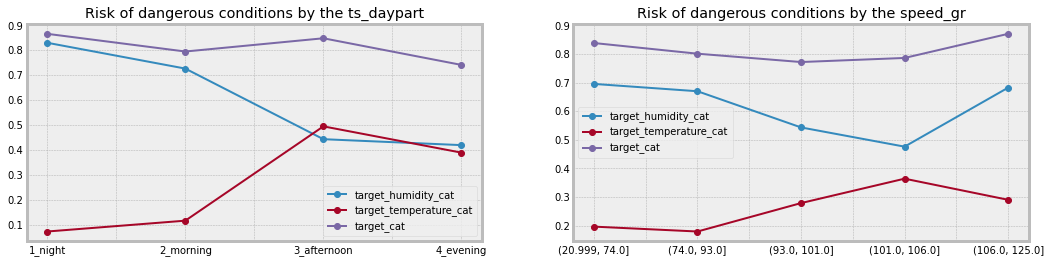

In [87]:
_,ax = plt.subplots(1,2, figsize = (16,4))
for i,feat in enumerate(['ts_daypart','speed_gr']):
    _ = df2.groupby(feat)[feats_trg2[0]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)
    _ = df2.groupby(feat)[feats_trg2[1]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)
    _ = df2.groupby(feat)[feats_trg2[2]].mean().plot(xlabel = '', style = '-o', ax = ax[i], title = f'Risk of dangerous conditions by the {feat}',legend = True)

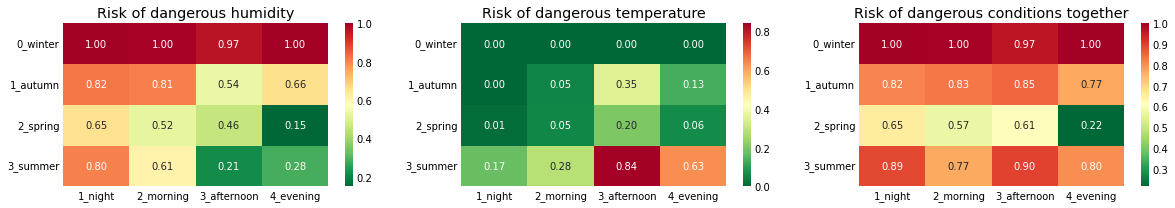

In [88]:
feats1 = ['ts_daypart','ts_season']

_, ax = plt.subplots(1,3, figsize = (18,3))

df_corr0 = df2.groupby(feats1)[feats_trg2[0]].mean().unstack().T
_ = sns.heatmap(df_corr0, ax = ax[0], cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws={"size": 10})
_ = ax[0].set_title('Risk of dangerous humidity')
_ = ax[0].set_xlabel('')
_ = ax[0].set_ylabel('')
_ = plt.yticks(rotation=0) 

df_corr1 = df2.groupby(feats1)[feats_trg2[1]].mean().unstack().T
_ = sns.heatmap(df_corr1, ax = ax[1], cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws={"size": 10})
_ = ax[1].set_title('Risk of dangerous temperature')
_ = ax[1].set_xlabel('')
_ = ax[1].set_ylabel('')
_ = plt.yticks(rotation=0) 

df_corr2 = df2.groupby(feats1)[feats_trg2[2]].mean().unstack().T
_ = sns.heatmap(df_corr2, ax = ax[2], cmap = 'RdYlGn_r', annot = True, fmt = '.2f', annot_kws={"size": 10})
_ = ax[2].set_title('Risk of dangerous conditions together')
_ = ax[2].set_xlabel('')
_ = ax[2].set_ylabel('')
_ = plt.yticks(rotation=0) 

In [89]:
df2.groupby(feats1)[feats_trg2[0]].count().unstack().T

ts_daypart,1_night,2_morning,3_afternoon,4_evening
ts_season,,,,
0_winter,721,4512,1954,471
1_autumn,644,2788,1837,517
2_spring,442,3764,2090,493
3_summer,1231,5655,5322,1966


### What combination of internal and external weather factors conclude an ideal temperature that is less than 25 degree celsius and less than 80% humidity? (10 points)

In [8]:
# data sampling
feats_wh1 = [
 'temperature',
 # 'feels_like',
 'humidity',
 'pressure',
 'clouds',
 'visibility',
 'wind_speed',
 # 'wind_gust',
 'wind_deg',
 'rain',
 'snow'
]

filt = df.target_temperature.notnull()
x = df[filt][feats_wh1]#+feats_trg1]
y = df[filt]['target_cat']

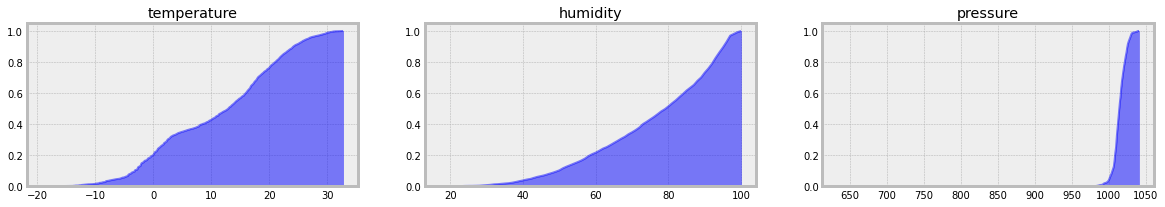

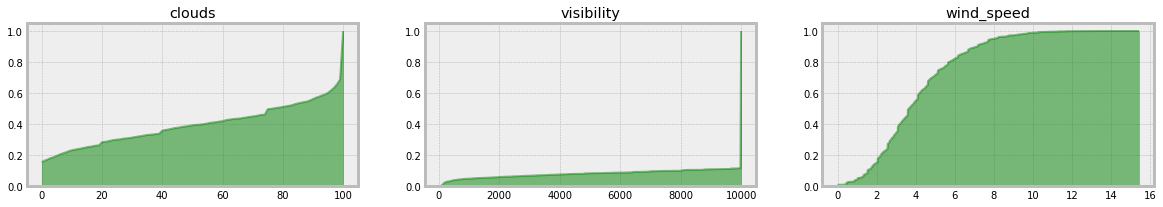

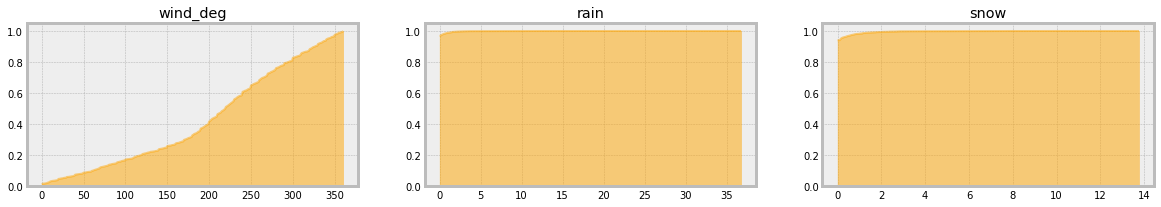

In [9]:
# distributions
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[:3]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'blue')
    
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[3:6]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'green')
    
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[6:]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'orange')

In [10]:
# preprocessing
x['temperature'] = x['temperature'].clip(lower = -15, upper = 30)
x['pressure'] = x['pressure'].clip(lower = 990, upper = 1050)
x['humidity'] = x['humidity'].clip(lower = 30, upper = 100)
x['humidity'] = x['humidity'].clip(lower = 30, upper = 100)
x['visibility'] = (x['visibility'] == 10000).astype(int)
x['rain'] = (x['rain'] > 0).astype(int)
x['snow'] = (x['snow'] > 0).astype(int)

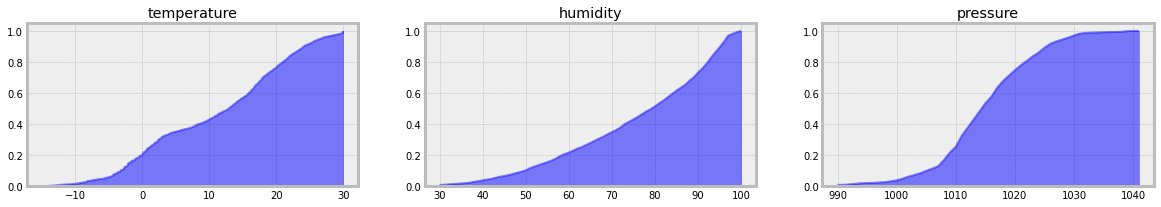

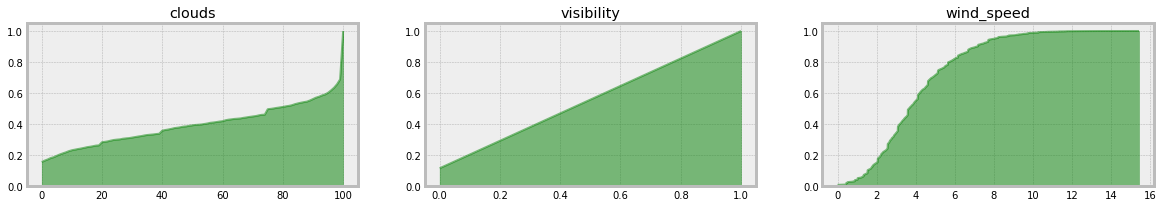

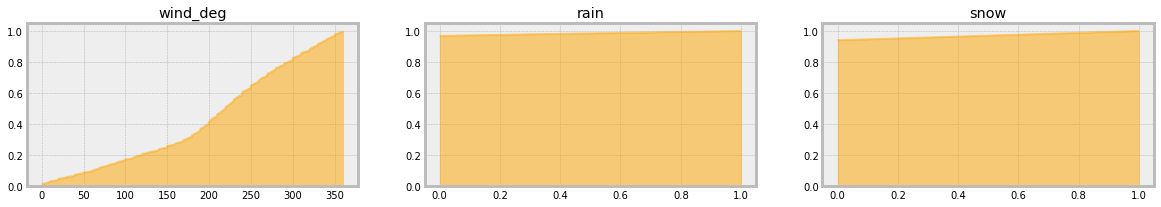

In [11]:
# distributions new
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[:3]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'blue')
    
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[3:6]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'green')
    
_,ax = plt.subplots(1,3,figsize = (18,3))
for i,feat in enumerate(feats_wh1[6:]):
    _ = x[feat].value_counts(normalize = True).sort_index().cumsum().plot(ax = ax[i], kind = 'area', alpha = .5, title = feat, color = 'orange')

In [12]:
# normalization
# x = x.rank(pct = True)
for f in x.columns:
    if f in ['rain','snow','visibility']:
        continue
    x[f] = (x[f] - x[f].mean())/x[f].std()

In [13]:
# Kmeans clustering
from sklearn.cluster import KMeans

# clustering model
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

print(x.shape)
x[:5]

(96967, 10)


,temperature,humidity,pressure,clouds,visibility,wind_speed,wind_deg,rain,snow,cluster
8133,-0.14,-2.16,1.19,-1.49,1,-0.21,-1.98,0,0,0
8135,-0.14,-2.16,1.19,-1.49,1,-0.21,-1.98,0,0,0
9462,-0.43,-0.91,1.19,-1.49,1,-0.21,-1.35,0,0,0
9464,-0.43,-0.91,1.19,-1.49,1,-0.21,-1.35,0,0,0
9549,-0.44,-0.91,1.19,-1.49,1,-0.21,-1.35,0,0,0


In [14]:
x.describe()

,temperature,humidity,pressure,clouds,visibility,wind_speed,wind_deg,rain,snow,cluster
count,"96,967.00","96,967.00","96,967.00","96,967.00","96,967.00","96,967.00","96,967.00","96,967.00","96,967.00","96,967.00"
mean,-0.00,-0.00,-0.00,-0.00,0.88,-0.00,-0.00,0.03,0.06,2.02
std,1.00,1.00,1.00,1.00,0.32,1.00,1.00,0.17,0.24,1.38
min,-2.42,-2.62,-3.05,-1.49,0.00,-1.88,-2.20,0.00,0.00,0.00
25%,-0.92,-0.74,-0.63,-1.13,1.00,-0.69,-0.61,0.00,0.00,1.00
50%,0.19,0.24,-0.02,0.39,1.00,-0.19,0.14,0.00,0.00,2.00
75%,0.81,0.86,0.70,0.95,1.00,0.54,0.76,0.00,0.00,3.00
max,1.79,1.38,3.13,0.95,1.00,5.29,1.62,1.00,1.00,4.00


In [22]:
# share of ideal internal conditions:
x['y'] = 1 - y
x.y.mean()

0.16620087246176535

In [67]:
x['cluster'] = kmeans.labels_

# rename clusters by the impact on the internal conditions
x['cluster'] = x['cluster'].map({0:1, 1:3, 2:5, 3:2, 4:4})

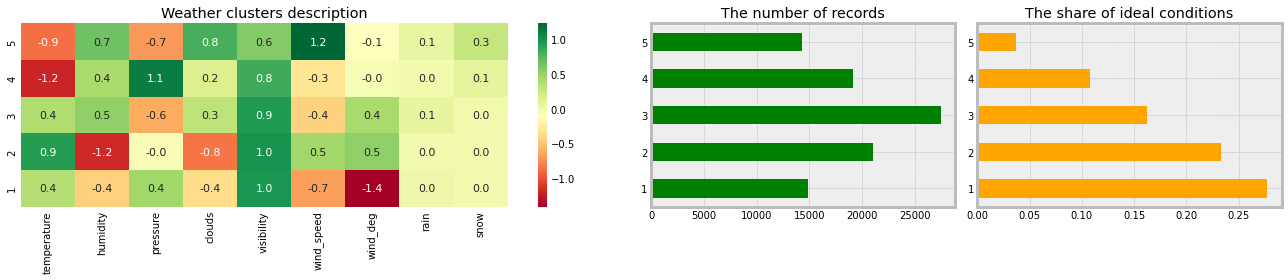

In [69]:
# clusters description
df_cl = x.groupby('cluster').mean().iloc[:,:-1]
df_cl = df_cl.sort_index(ascending = False)

_, ax = plt.subplots(1,3, figsize = (18,4), width_ratios=[2, 1, 1])
_ = sns.heatmap(df_cl, ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.1f', annot_kws={"size": 11})
_ = ax[0].set_title('Weather clusters description')
_ = ax[0].set_xlabel('')
_ = ax[0].set_ylabel('')
_ = plt.yticks(rotation=0)

_ = x.groupby('cluster').size().plot(ax = ax[1], kind = 'barh', color = 'green', title = 'The number of records', ylabel = '')

_ = x.groupby('cluster').y.mean().plot(ax = ax[2], kind = 'barh', color = 'orange', title = 'The share of ideal conditions', ylabel = '')

plt.tight_layout()